## FIR Filters in EEG Signal Processing

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
Necessary libraries
</div>

In [91]:
import mne
import matplotlib.pyplot as plt 
from scipy.signal import detrend
import os
import pandas as pd  
import numpy as np

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
What is its use in EEG studies?
</div>

<div style="text-align: justify;">
<span style="color: #b1c5fc;">FIR Filters (Finite Impulse Response)</span> are a class of digital filters widely used in signal processing, including EEG (electroencephalographic) signal analysis. Unlike IIR (Infinite Impulse Response) filters, FIR filters have an impulse response that decays over a finite number of samples, meaning that their response to an impulsive input is of limited duration.
</div>


<div style="text-align: left;">
<img src="assets\BODE.png"><img src="assets\FILTERS_TIPE.png">
</div>
<br>

<div style="text-align: justify;">
In the previous image, we can observe the effect of filters on a frequency signal, attenuating the gain of frequencies above a cutoff frequency (1 Hz).</div>

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">
The first thing is to load our EEG signal</div>

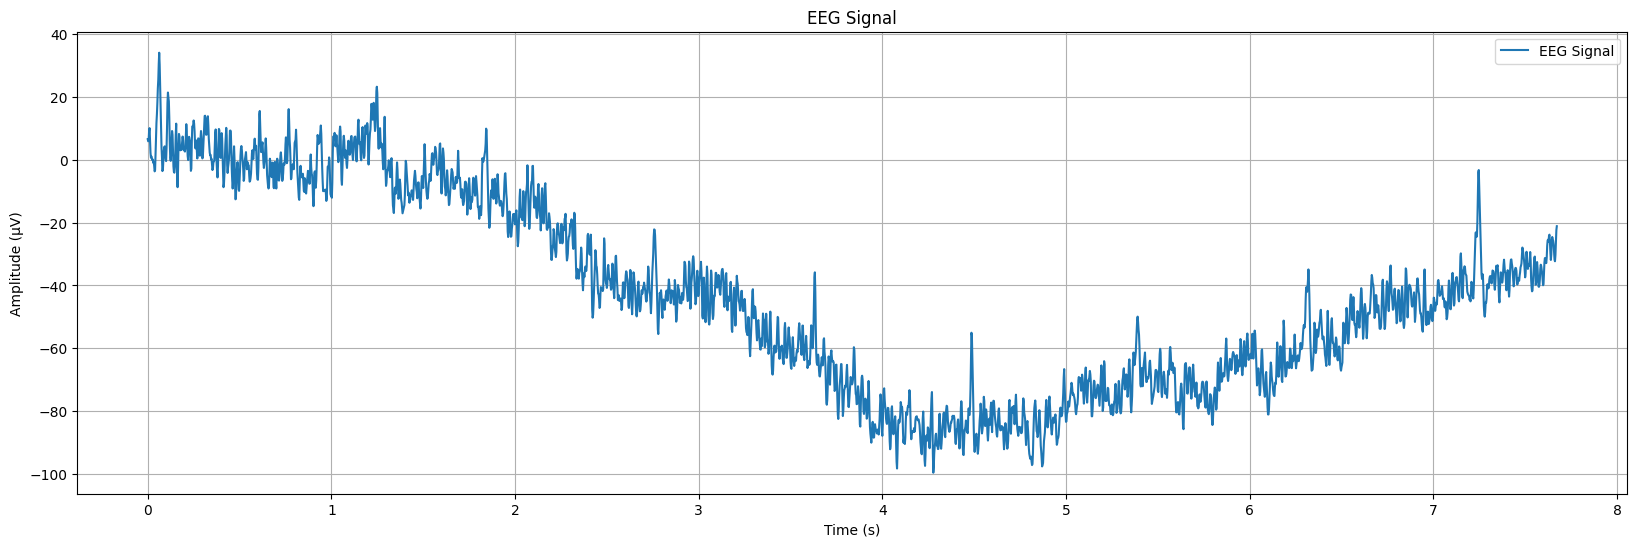

In [92]:
# Ruta al archivo CSV
csv_file_path = 'database/eeg_signal_data.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(csv_file_path)

# Extraer las columnas de interés
times = df['Time (s)']
data_volts = df['Amplitude (µV)']

# Create the plot
plt.figure(figsize=(20, 6))                         # Set the figure size
plt.plot(times, data_volts, label='EEG Signal')     # Plot the EEG signal with a label
plt.xlabel('Time (s)')                              # Label for the x-axis
plt.ylabel('Amplitude (µV)')                        # Label for the y-axis
plt.title('EEG Signal')                             # Title of the plot
plt.legend()                                        # Display the legend
plt.grid(True)                                      # Add a grid for better readability

# Show the plot
plt.show()


<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">BAND PASS FILTER</div>

 This code performs<span style="color: #b1c5fc;"> bandpass filtering</span> on an EEG signal to isolate frequencies within the range of <span style="color: #b1c5fc;"> 0.5 Hz to 70 Hz</span>. First, it loads the EEG data from a CSV file, extracts the relevant time and amplitude columns, and calculates the sampling rate based on the time intervals. Next, it designs a Butterworth bandpass filter with the specified cutoff frequencies and applies this filter to the signal data. Finally, the code creates two plots: one showing the original EEG signal and another displaying the filtered signal, allowing for visual comparison of the effects of filtering on the data.
 
<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">The Nyquist Theorem</div>
 The Nyquist Theorem, also known as the Nyquist-Shannon Sampling Theorem, is a fundamental principle in signal processing that states a continuous signal can be completely represented and reconstructed if it is sampled at a rate greater than twice its highest frequency component. This critical sampling rate is known as the Nyquist rate. According to the theorem, to accurately capture all the information in a signal without aliasing, the sampling frequency must be at least twice the maximum frequency present in the signal. For example, if a signal contains frequency components up to 1 kHz, it must be sampled at a minimum of 2 kHz. This theorem underpins many digital processing techniques and is essential for ensuring that sampled data accurately reflects the original signal.

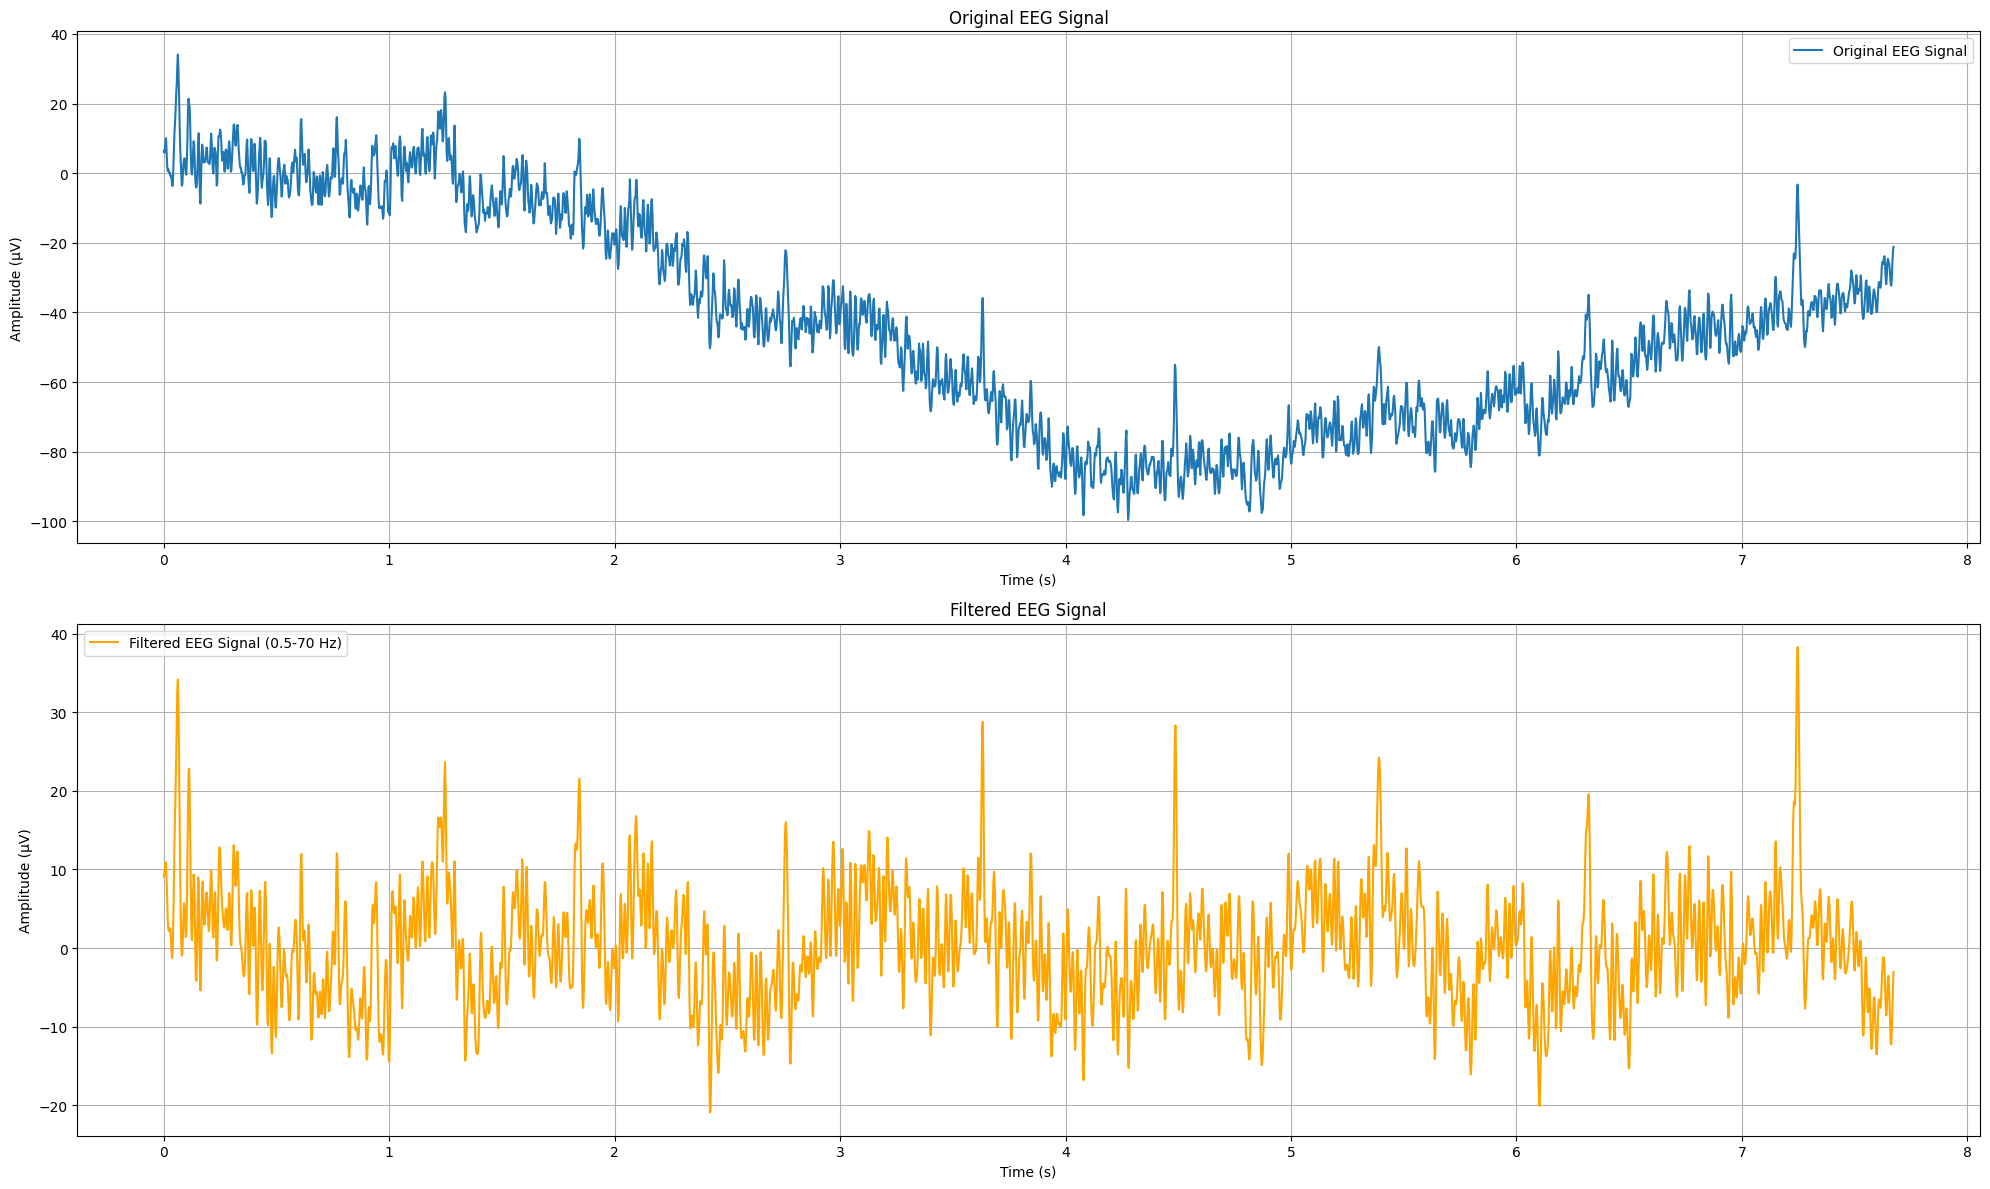

In [93]:
# Extract columns of interest
times = df['Time (s)']
data_volts = df['Amplitude (µV)']

# Define the sampling frequency
sampling_rate = 1 / (times[1] - times[0])                   # Calculate the sampling rate based on the time interval

# Design a bandpass filter
lowcut = 0.5                                                # Lower cutoff frequency in Hz
highcut = 70.0                                              # Upper cutoff frequency in Hz
nyquist = 0.5 * sampling_rate                               # Nyquist frequency
low = lowcut / nyquist
high = highcut / nyquist

# Create a bandpass filter using Butterworth filter design
b, a = signal.butter(4, [low, high], btype='band')

# Apply the bandpass filter to the signal
filtered_data = signal.filtfilt(b, a, data_volts)

# Create plots for the original and filtered signals
plt.figure(figsize=(20, 12))

# Plot of the original EEG signal
plt.subplot(2, 1, 1)
plt.plot(times, data_volts, label='Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title('Original EEG Signal')
plt.legend()
plt.grid(True)

# Plot of the filtered EEG signal
plt.subplot(2, 1, 2)
plt.plot(times, filtered_data, label='Filtered EEG Signal (0.5-70 Hz)', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title('Filtered EEG Signal')
plt.legend()
plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">We add a Notch Filter</div>

processing on EEG data to enhance its quality through filtering. First, it calculates the sampling rate based on the time intervals between data points, assuming uniform spacing. Next, it applies a bandpass filter with a cut-off frequency range between 0.5 Hz and 50 Hz, using an 8th-order Butterworth filter to remove frequencies outside this range and thus focus on the desired signal components. Subsequently, a notch filter is applied to the bandpass-filtered signal to eliminate power line noise at 50 Hz, using a high Q factor for a sharp frequency notch. Finally, the code plots three time-domain signals for comparison: the original EEG signal, the signal after bandpass filtering, and the signal after additional notch filtering, all displayed in a three-panel figure for visual assessment of the filtering effects.

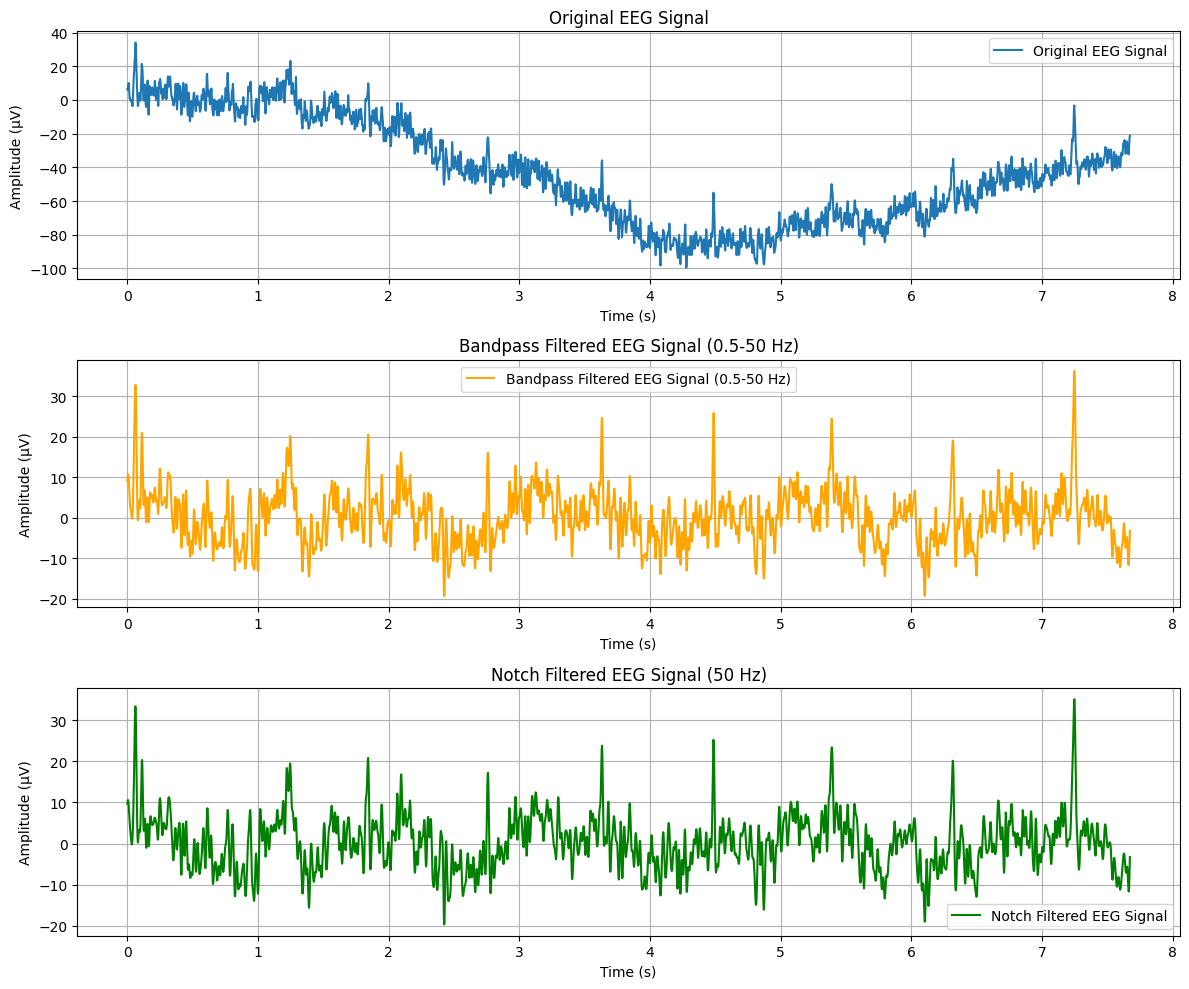

In [94]:
# Define the sampling rate
sampling_rate = 1 / (times[1] - times[0])  # Assumes uniform spacing

# Apply Bandpass Filter (0.5 Hz to 70 Hz)
lowcut = 0.5
highcut = 50.0
order = 8               # Increased order for steeper slope
b, a = signal.butter(4, [lowcut, highcut], fs=sampling_rate, btype='band')
data_bandpass = signal.filtfilt(b, a, data_volts)

# Apply Notch Filter (50 Hz, typical for power line noise)
notch_freq = 50.0
Q = 100  # Increased Q factor for a sharper notch
b_notch, a_notch = signal.iirnotch(notch_freq, Q=30, fs=sampling_rate)
data_notch = signal.filtfilt(b_notch, a_notch, data_bandpass)

# Plot original and filtered signals
plt.figure(figsize=(12, 10))

# Plot original signal
plt.subplot(3, 1, 1)
plt.plot(times, data_volts, label='Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title('Original EEG Signal')
plt.grid(True)
plt.legend()

# Plot bandpass filtered signal
plt.subplot(3, 1, 2)
plt.plot(times, data_bandpass, label='Bandpass Filtered EEG Signal (0.5-50 Hz)', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title('Bandpass Filtered EEG Signal (0.5-50 Hz)')
plt.grid(True)
plt.legend()

# Plot notch filtered signal
plt.subplot(3, 1, 3)
plt.plot(times, data_notch, label='Notch Filtered EEG Signal', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title('Notch Filtered EEG Signal (50 Hz)')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


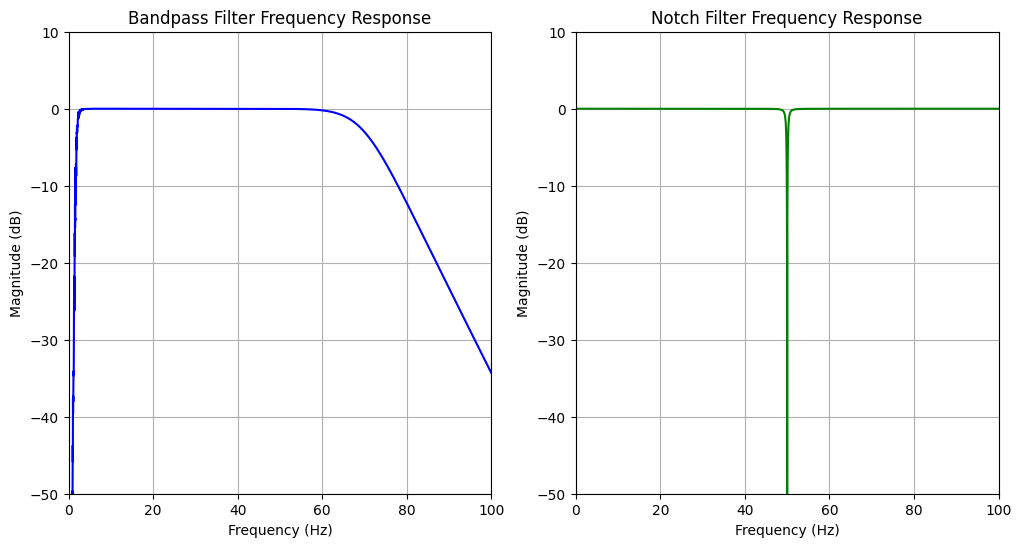

In [95]:
# Define the sampling rate
sampling_rate = 400  # Example: 1000 Hz

# Apply Bandpass Filter (0.5 Hz to 70 Hz) with increased order
lowcut = 0.5
highcut = 70.0
order = 8                # Increased order for steeper slope
b_bandpass, a_bandpass = signal.butter(order, [lowcut, highcut], fs=sampling_rate, btype='band')

# Apply Notch Filter (50 Hz, typical for power line noise) with increased Q factor
notch_freq = 50.0
Q = 100                 # Increased Q factor for a sharper notch
b_notch, a_notch = signal.iirnotch(notch_freq, Q, fs=sampling_rate)

# Frequency response for Bandpass Filter
w_bandpass, h_bandpass = signal.freqz(b_bandpass, a_bandpass, worN=8000, fs=sampling_rate)

# Frequency response for Notch Filter
w_notch, h_notch = signal.freqz(b_notch, a_notch, worN=8000, fs=sampling_rate)

# Plot Frequency Response (Magnitude) for Bandpass Filter
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(w_bandpass, 20 * np.log10(np.abs(h_bandpass)), 'b')
plt.title('Bandpass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0, 100)
plt.ylim(-50, 10)
plt.grid(True)

# Plot Frequency Response (Magnitude) for Notch Filter
plt.subplot(1, 2, 2)
plt.plot(w_notch, 20 * np.log10(np.abs(h_notch)), 'g')
plt.title('Notch Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.ylim(-50, 10)
plt.xlim(0, 100)
plt.grid(True)



<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">Power spectral diagram after filtering</div>

We plot the power spectral diagram to see how it has changed after enhancing the signal filtering.

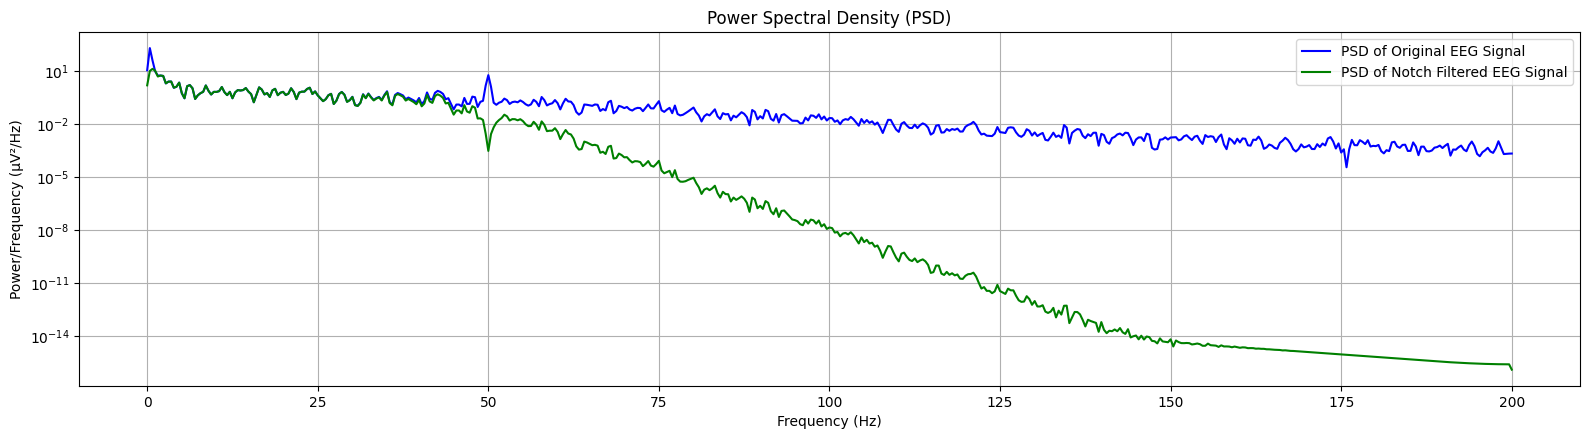

In [96]:
# Compute the Power Spectral Density (PSD) using Welch's method for the original signal
frequencies_original, psd_original = signal.welch(data_volts, fs=sampling_rate, nperseg=1024)

# Compute the Power Spectral Density (PSD) using Welch's method for the filtered signal
frequencies_filtered, psd_filtered = signal.welch(data_notch, fs=sampling_rate, nperseg=1024)

plt.figure(figsize=(16, 16))
# Plot the Power Spectral Density (PSD) of the original and filtered signals
plt.subplot(4, 1, 4)
plt.semilogy(frequencies_original, psd_original, label='PSD of Original EEG Signal', color='blue')
plt.semilogy(frequencies_filtered, psd_filtered, label='PSD of Notch Filtered EEG Signal', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (µV²/Hz)')
plt.title('Power Spectral Density (PSD)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Parameters to Consider When Filtering

<span style="color: #b1c5fc;">Sampling Rate:</span>
This is the number of samples per second. It should be at least twice the maximum frequency of the signal to avoid aliasing. Typically, it ranges from 250 Hz to 1000 Hz for EEG signals, depending on the equipment used.

<span style="color: #b1c5fc;">Cutoff Frequencies:</span>
These are the limits in a bandpass filter that define the frequency range the filter will allow to pass. For example, 0.5 Hz to 50 Hz for EEG signals.

<span style="color: #b1c5fc;">Filter Order:</span>
This indicates the complexity of the filter. A higher order provides a more abrupt transition between passing and attenuated frequencies but can be more computationally intensive.

<span style="color: #b1c5fc;">Q Factor:</span>
This specifies the width of the notch in a notch filter. A high Q factor creates a narrow notch, ideal for eliminating specific frequencies like power line noise.

<span style="color: #b1c5fc;">Filter Type:</span>
Determines the function of the filter, such as bandpass to focus on a frequency range or notch to eliminate specific frequencies. Examples include Butterworth, Chebyshev, and elliptic filters.

<span style="color: #b1c5fc;">Data Windowing:</span>
Segments the signal to minimize the effects of discontinuities. Windows such as Hamming or Hanning help improve analysis accuracy.

<span style="color: #b1c5fc;">Implementation Method:</span>
Defines how the filter is applied, either digitally using algorithms or through analog methods. Digital filters can be implemented in various ways to optimize performance.

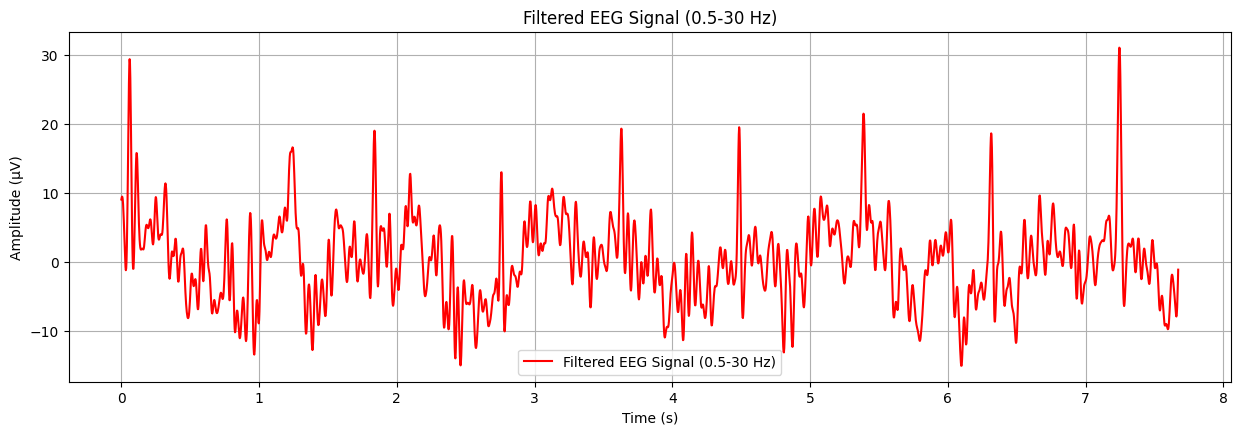

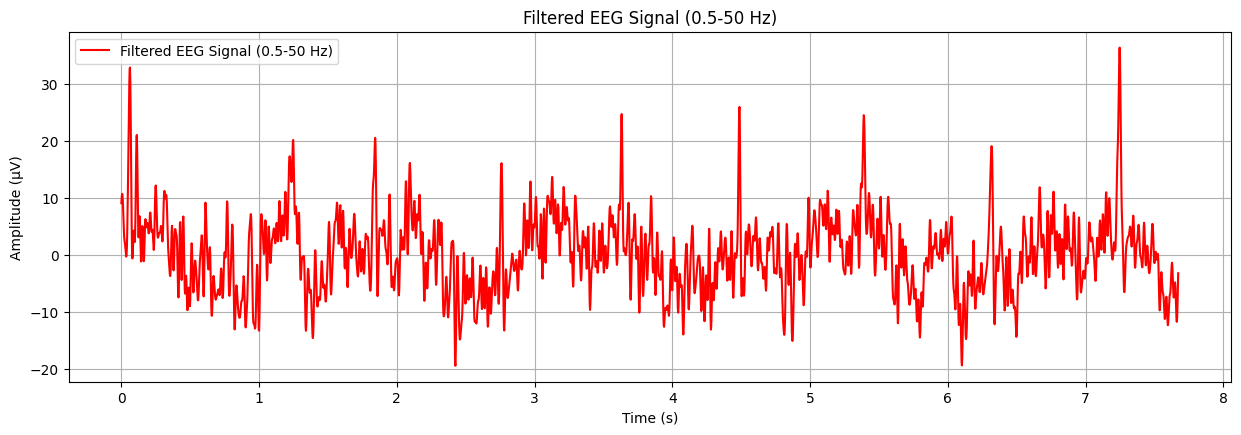

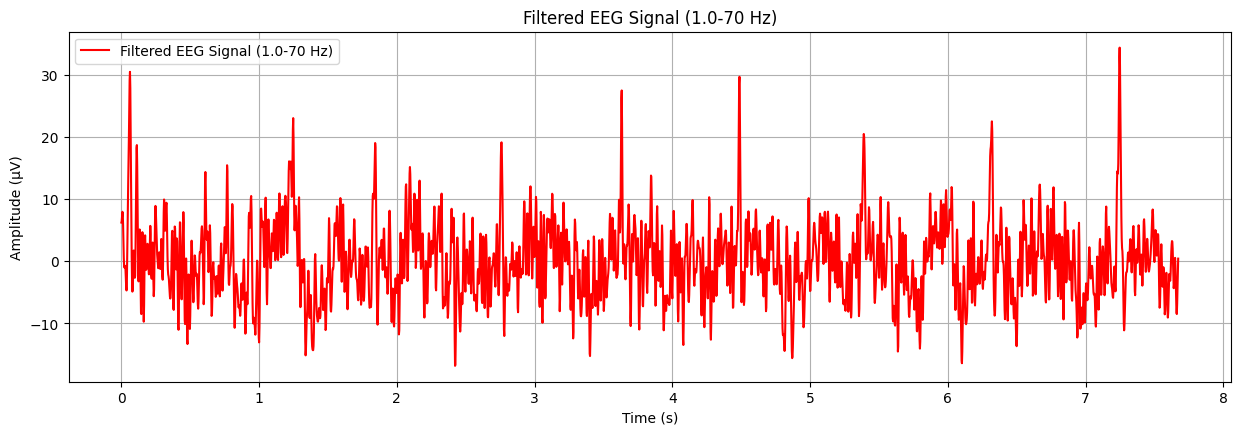

In [97]:
# Different cutoff frequencies
cutoff_frequencies = [(0.5, 30), (0.5, 50), (1.0, 70)]

for lowcut, highcut in cutoff_frequencies:
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    
    # Create a bandpass filter
    b, a = signal.butter(4, [low, high], btype='band')
    
    # Apply the bandpass filter to the signal
    filtered_data = signal.filtfilt(b, a, data_volts)
    
    plt.figure(figsize=(15, 10))
    
    # Plot of the filtered EEG signal
    plt.subplot(2, 1, 2)
    plt.plot(times, filtered_data, label=f'Filtered EEG Signal ({lowcut}-{highcut} Hz)', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'Filtered EEG Signal ({lowcut}-{highcut} Hz)')
    plt.legend()
    plt.grid(True) 
    plt.show()


C:\Users\DeusWin\AppData\Local\Temp\ipykernel_6296\4146734555.py:33: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(h)), 'b')


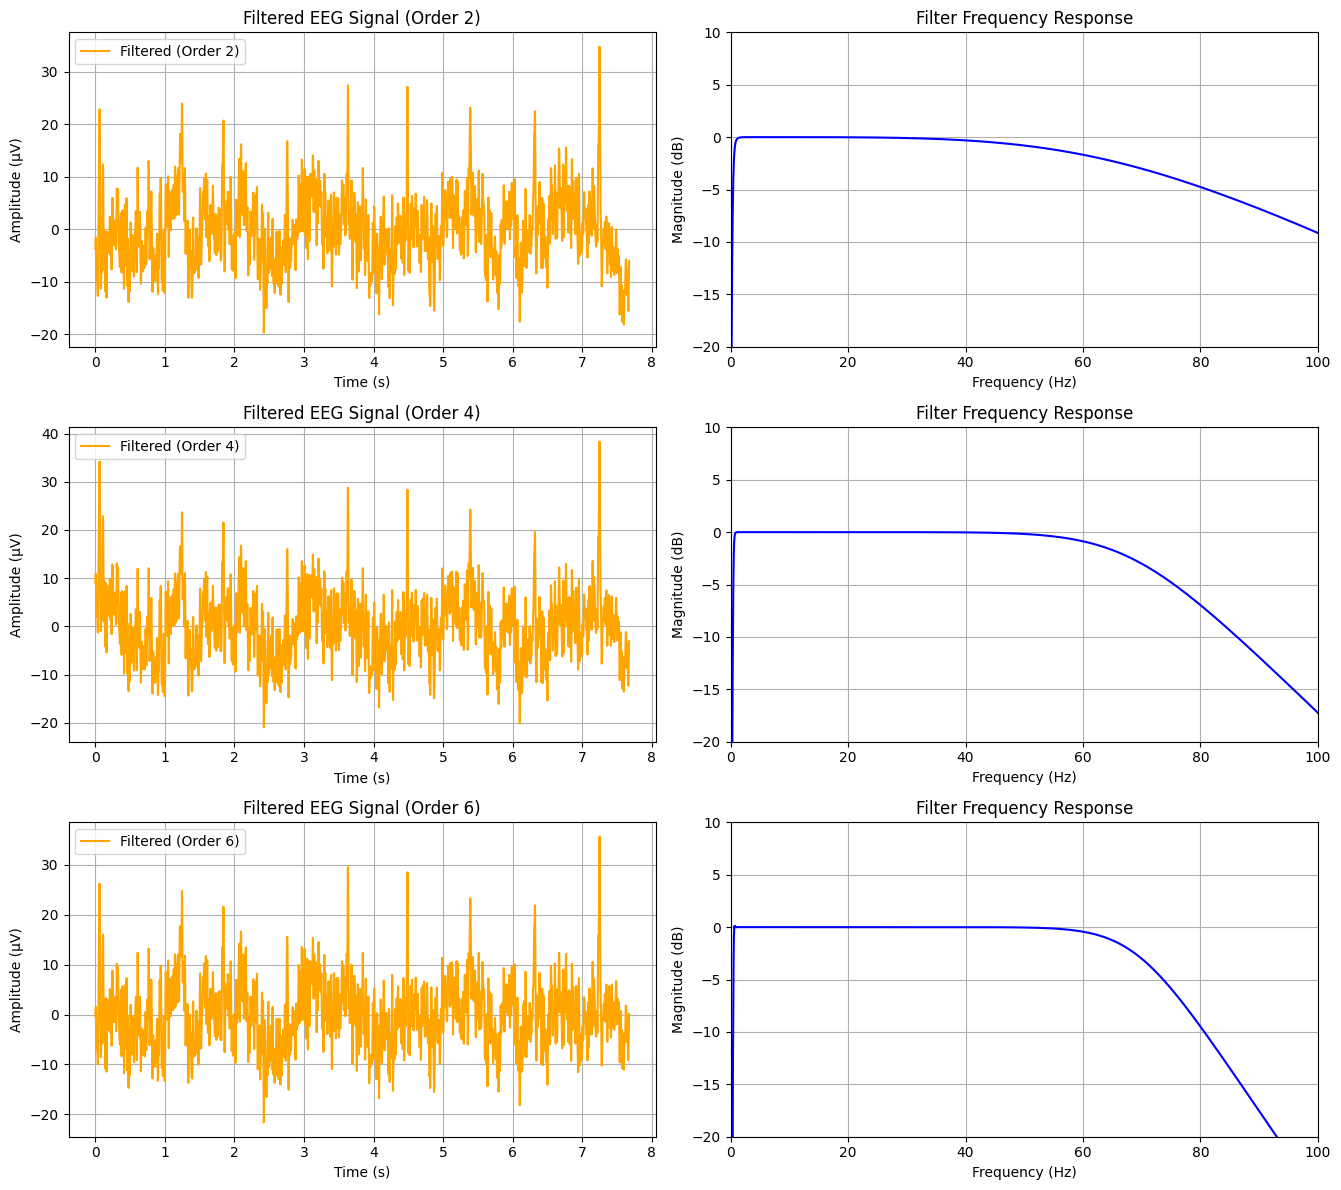

In [98]:
# Parameters for different filters
cutoff_frequencies = (0.5, 70)  # Single cutoff frequency range for simplicity
filter_orders = [2, 4, 6]  # Different filter orders
sampling_rate = 400  # Example sampling rate

# Prepare the plots
plt.figure(figsize=(20, 12))

for i, order in enumerate(filter_orders):
    lowcut, highcut = cutoff_frequencies
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    
    # Create a bandpass filter
    b, a = signal.butter(order, [low, high], btype='band')
    
    # Apply the bandpass filter to the signal
    filtered_data = signal.filtfilt(b, a, data_volts)
    
    # Plot of the filtered EEG signal
    plt.subplot(len(filter_orders), 3, i * 3 + 1)
    plt.plot(times, filtered_data, label=f'Filtered (Order {order})', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'Filtered EEG Signal (Order {order})')
    plt.legend()
    plt.grid(True)
    
    # Additional plot: Frequency Response of the Filter (Magnitude only)
    w, h = signal.freqz(b, a, worN=8000, fs=sampling_rate)
    plt.subplot(len(filter_orders), 3, i * 3 + 2)
    plt.plot(w, 20 * np.log10(np.abs(h)), 'b')
    plt.title('Filter Frequency Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.xlim(0, 100)
    plt.ylim(-20, 10)
    plt.grid(True)
    
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

C:\Users\DeusWin\AppData\Local\Temp\ipykernel_6296\3182479776.py:41: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(h)), 'b')


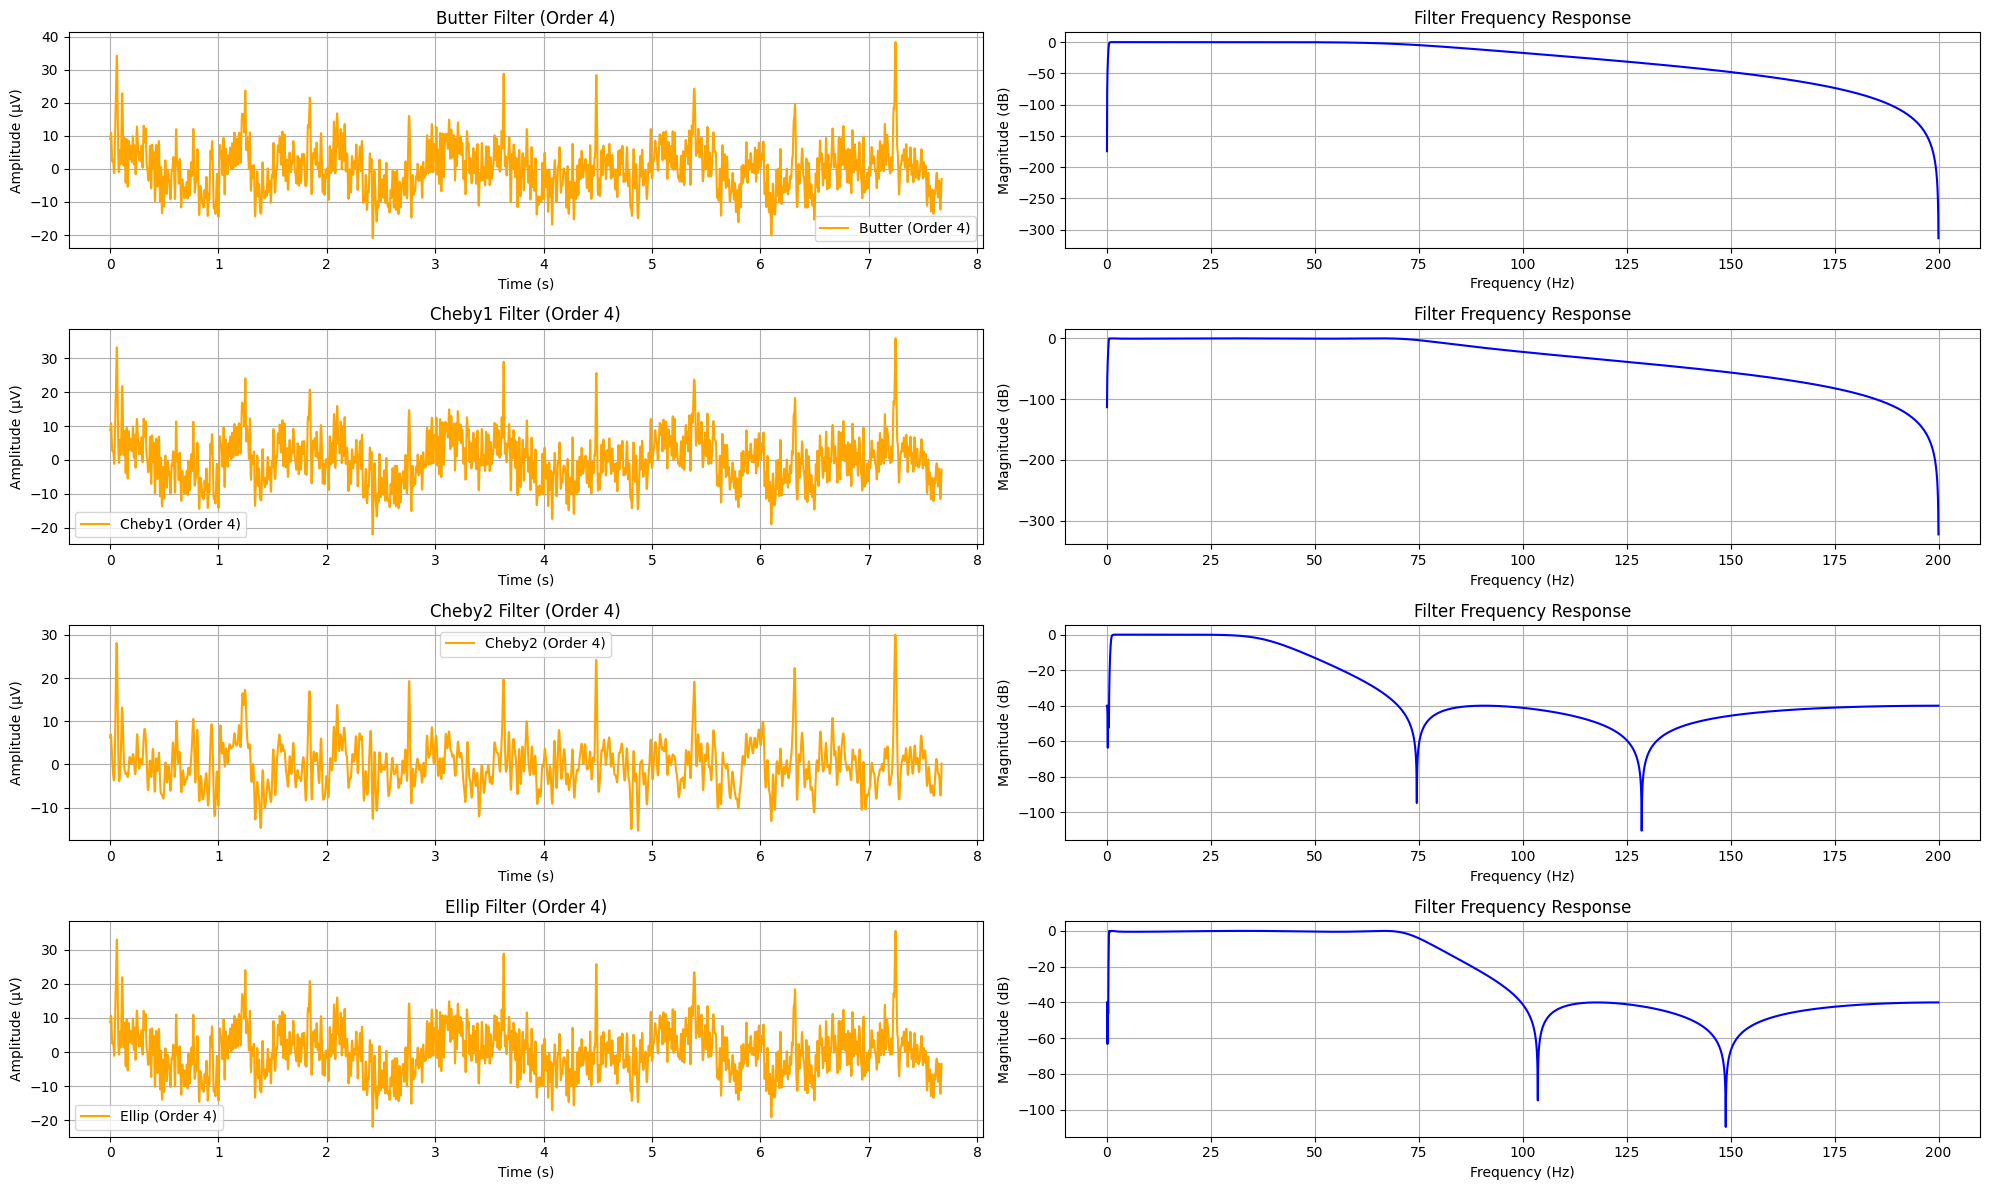

In [99]:
# Parameters for different filters
cutoff_frequencies = (0.5, 70)  # Single cutoff frequency range for simplicity
filter_types = ['butter', 'cheby1', 'cheby2', 'ellip']  # Types of filters
filter_order = 4  # Fixed filter order
sampling_rate = 400  # Example sampling rate

# Prepare the plots
plt.figure(figsize=(20, 12))

for i, filter_type in enumerate(filter_types):
    lowcut, highcut = cutoff_frequencies
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    
    # Create the filter based on type
    if filter_type == 'butter':
        b, a = signal.butter(filter_order, [low, high], btype='band')
    elif filter_type == 'cheby1':
        b, a = signal.cheby1(filter_order, 0.5, [low, high], btype='band')
    elif filter_type == 'cheby2':
        b, a = signal.cheby2(filter_order, 40, [low, high], btype='band')
    elif filter_type == 'ellip':
        b, a = signal.ellip(filter_order, 0.5, 40, [low, high], btype='band')
    
    # Apply the filter to the signal
    filtered_data = signal.filtfilt(b, a, data_volts)
    
    # Plot of the filtered EEG signal
    plt.subplot(len(filter_types), 2, i * 2 + 1)
    plt.plot(times, filtered_data, label=f'{filter_type.capitalize()} (Order {filter_order})', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'{filter_type.capitalize()} Filter (Order {filter_order})')
    plt.legend()
    plt.grid(True)
    
    # Additional plot: Frequency Response of the Filter (Magnitude only)
    w, h = signal.freqz(b, a, worN=8000, fs=sampling_rate)
    plt.subplot(len(filter_types), 2, i * 2 + 2)
    plt.plot(w, 20 * np.log10(np.abs(h)), 'b')
    plt.title('Filter Frequency Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

<div style="text-align: justify;font-size: 28px;color: #b1c5fc;">Final Filter and save the signal</div>

We are going to do the complete filtering of the signal and save it by correctly choosing the parameters

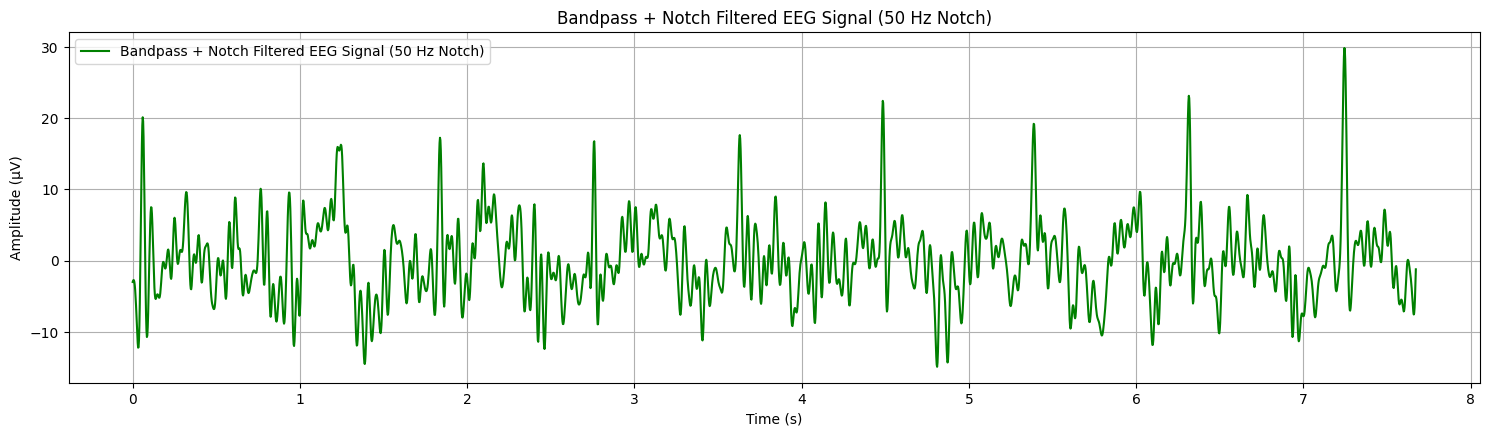

In [100]:
# Define the sampling rate
sampling_rate = 1 / (times[1] - times[0])  # Assumes uniform spacing

# Apply Bandpass Filter (0.5 Hz to 50 Hz)
lowcut = 0.5
highcut = 50.0
order = 5  # Increased order for steeper slope
b_bandpass, a_bandpass = signal.cheby2(order, 40, [lowcut, highcut], fs=sampling_rate, btype='band')
data_bandpass = signal.filtfilt(b_bandpass, a_bandpass, data_volts)

# Apply Notch Filter (50 Hz, typical for power line noise)
notch_freq = 50.0
Q = 30  # Adjust Q factor for a sharper notch
b_notch, a_notch = signal.iirnotch(notch_freq, Q=Q, fs=sampling_rate)
data_notch = signal.filtfilt(b_notch, a_notch, data_bandpass)

# Plot original and filtered signals
plt.figure(figsize=(15, 12))

# Plot signal after applying both filters
plt.subplot(3, 1, 3)
plt.plot(times, data_notch, label='Bandpass + Notch Filtered EEG Signal (50 Hz Notch)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title('Bandpass + Notch Filtered EEG Signal (50 Hz Notch)')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

# Create a DataFrame with the filtered signal
df = pd.DataFrame({'Time': times, 'Filtered Signal': data_notch})

# Save the DataFrame to a CSV file
df.to_csv('database/filtered_signal.csv', index=False)